# Major Leagues

## Soccer scores

#### Author: Ruturaj Kiran Vaidya

#### References:

<ul>
<li>Sklearn Linear Regression: <a>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a></li>
<li>Linear Regression Guide: <a>https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f</a></li>
</ul>

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Dataset: <a>https://github.com/fivethirtyeight/data/tree/master/soccer-spi</a>
#### I have chosen the soccer dataset
#### Specific Dataset Link: <a>https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv</a>
This dataset contains SPI rankings and forecast back 2016. SPI is a soccer power index.

It is important to clear these terms first:
<ul>
<li><b>Xg:</b> Expected goals</li>
<li><b>NsXg:</b> Non shot Xg</li>
</ul>

Other features are self explanatory.

### Importing Datasets

In [2]:
matches = pd.read_csv("../data/external/spi_matches.csv")

In [3]:
matches.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


In [4]:
matches.keys()

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [5]:
matches.shape

(32278, 22)

In [6]:
# Dropping NAs
matches.dropna(inplace = True)
matches.drop_duplicates(inplace=True)
# It's true that the dataset disfigures, but we need to do this anyways for end analysis
matches.shape

(13044, 22)

### Feature Engineering

In [7]:
# There is lot of features available
# The only thing I can think of is split the date
lam = lambda x: pd.Series([x['date'].split("-")[0], x['date'].split("-")[1], x['date'].split("-")[-1]])
matches[["Year", "Month", "Day"]] = matches.apply(lam, axis=1)
# Drop Date
del matches["date"]

In [8]:
matches.tail()

,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Year,Month,Day
27120,2105,Brasileiro Série A,Flamengo,Vasco da Gama,73.70,50.52,0.7759,0.0638,0.1603,2.18,...,4.0,2.28,2.29,1.37,1.06,4.20,4.20,2019,11,13
27121,1948,Australian A-League,Central Coast Mariners,Adelaide United,16.31,29.50,0.2657,0.4943,0.2400,1.14,...,3.0,1.76,3.10,1.08,2.34,1.05,3.15,2019,11,15
27122,1948,Australian A-League,Western United,Newcastle Jets,29.66,28.35,0.4613,0.2883,0.2504,1.52,...,1.0,1.43,1.22,2.32,1.33,0.00,1.05,2019,11,16
27150,2105,Brasileiro Série A,Santos,São Paulo,63.23,56.22,0.5011,0.2056,0.2933,1.25,...,1.0,1.45,1.29,0.54,2.27,1.05,1.05,2019,11,16
27151,2105,Brasileiro Série A,Fluminense,Atletico Mineiro,51.87,53.38,0.5337,0.2273,0.2390,1.68,...,1.0,0.96,0.62,1.38,0.85,1.05,1.05,2019,11,16


In [9]:
# We have a unique league id per league
# Let's encode team names
matches["team1"] = matches["team1"].astype('category').cat.codes
matches["team2"] = matches["team2"].astype('category').cat.codes
# Also dropping "league", as we already have league id
del matches["league"]

In [10]:
matches.tail()

,league_id,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Year,Month,Day
27120,2105,159,384,73.70,50.52,0.7759,0.0638,0.1603,2.18,0.46,...,4.0,2.28,2.29,1.37,1.06,4.20,4.20,2019,11,13
27121,1948,87,13,16.31,29.50,0.2657,0.4943,0.2400,1.14,1.64,...,3.0,1.76,3.10,1.08,2.34,1.05,3.15,2019,11,15
27122,1948,406,257,29.66,28.35,0.4613,0.2883,0.2504,1.52,1.14,...,1.0,1.43,1.22,2.32,1.33,0.00,1.05,2019,11,16
27150,2105,325,360,63.23,56.22,0.5011,0.2056,0.2933,1.25,0.69,...,1.0,1.45,1.29,0.54,2.27,1.05,1.05,2019,11,16
27151,2105,160,35,51.87,53.38,0.5337,0.2273,0.2390,1.68,1.01,...,1.0,0.96,0.62,1.38,0.85,1.05,1.05,2019,11,16


### Now using regression models

We have determine score1 and score2 using other columns as features

In [11]:
# Selecting all columns except score1 and score2
X = matches[matches.columns.difference(['score1', 'score2'])]
# Selecting score1 and score2 as lables
y1 = matches['score1']
y2 = matches['score2']

In [12]:
# splitting training and testing data
# Splitting data 80:20 for training and testing
# random_state value selection: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)

In [13]:
# Now, training with linear regression algorithm
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor1.fit(X1_train, y1_train)
regressor2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# Let's predict to see the effectivity of this model
y1_pred = regressor1.predict(X1_test)
y2_pred = regressor2.predict(X2_test)

In [17]:
# We can compare actual and predicted values
# Ref: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
df1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred.flatten()})
df2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred.flatten()})
print(f"For Score2:\n\n{df1.tail(10)}")
print("\n----------------------------------------\n")
print(f"For Score2:\n\n{df2.tail(10)}")

For Score2:

       Actual  Predicted
8221      4.0   3.800115
10821     0.0  -0.017816
11223     2.0   2.031791
23379     2.0   2.033466
23143     2.0   1.717345
25409     3.0   2.705492
17046     2.0   2.109627
7881      0.0  -0.037700
19428     2.0   2.075360
23461     3.0   3.082668

----------------------------------------

For Score2:

       Actual  Predicted
8221      2.0   2.052634
10821     0.0   0.055746
11223     0.0  -0.041082
23379     2.0   2.090004
23143     0.0  -0.039421
25409     0.0  -0.062492
17046     0.0  -0.042531
7881      1.0   1.045684
19428     3.0   2.951804
23461     2.0   2.067692


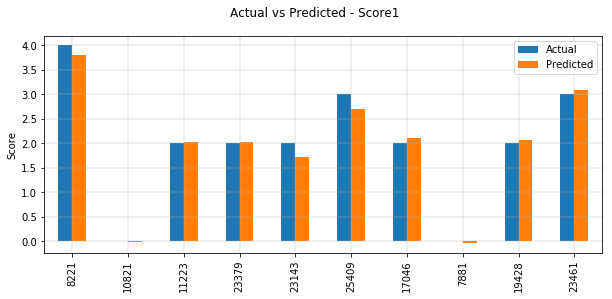

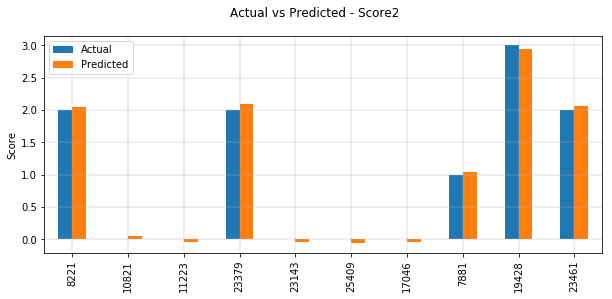

In [18]:
# From above test, it seem like the model prediction is quite nice!
# Let's plot it
# plot ref: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
df1.tail(10).plot(kind='bar',figsize=(10, 4))
plt.grid(which='major', linestyle='-', linewidth='0.4')
plt.grid(which='minor', linestyle=':', linewidth='0.4')
plt.ylabel('Score')
plt.suptitle('Actual vs Predicted - Score1')
plt.show()

df2.tail(10).plot(kind='bar',figsize=(10, 4))
plt.grid(which='major', linestyle='-', linewidth='0.4')
plt.grid(which='minor', linestyle=':', linewidth='0.4')
plt.ylabel('Score')
plt.suptitle('Actual vs Predicted - Score2')
plt.show()

In [19]:
# Now finding the error values
# Ref: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

# For score1
print(f"Mean Absolute Error for Score1: {metrics.mean_absolute_error(y1_test, y1_pred)}")  
print(f"Mean Squared Error for Score1: {metrics.mean_squared_error(y1_test, y1_pred)}")  
print(f"Root Mean Squared Error for Score1: {np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))}")

print("\n----------------------------------------\n")

# For score2
print(f"Mean Absolute Error for Score2: {metrics.mean_absolute_error(y2_test, y2_pred)}")  
print(f"Mean Squared Error for Score2: {metrics.mean_squared_error(y2_test, y2_pred)}")  
print(f"Root Mean Squared Error for Score2: {np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))}")

Mean Absolute Error for Score1: 0.10499528633508656
Mean Squared Error for Score1: 0.028247370031003083
Root Mean Squared Error for Score1: 0.16806953927170468

----------------------------------------

Mean Absolute Error for Score2: 0.0740445139458311
Mean Squared Error for Score2: 0.015023712172868157
Root Mean Squared Error for Score2: 0.12257125345230079
